In [1]:
import pandas as pd 
from io import StringIO
csv_data = \
'''A, B, C, D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,,8.0
10.0,11.0,12.0,
'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

In [3]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [4]:
df.dropna(axis= 0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(axis=1 )

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(thresh=3 )

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [10]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])
df.columns = ['colors', 'size', 'price', 'classlabel']
df

,colors,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [11]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1
}
df['size'] = df['size'].map(size_mapping)
df

,colors,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [12]:
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [13]:
import numpy as np
class_mapping = {label:idx for  idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,colors,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [15]:
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,colors,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [16]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [17]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [18]:
X = df[['colors', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

C:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [20]:
pd.get_dummies(df[['price', 'colors', 'size']])

,price,size,colors_blue,colors_green,colors_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [21]:
pd.get_dummies(df[['price', 'colors', 'size']], drop_first=True)

,price,size,colors_green,colors_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [22]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data', header = None)

In [23]:
df_wine.columns = ['Class label', 'Alcohol', 
                   'Malic acid', 'Ash', 
                   'Alcalinity of ash', 
                   'Magenisium', 'Total phenols', 
                   'Flavanoids', 'Nonflavanoid', 
                    'Proanthocyanis', 'Color intensity', 
                   'Hue','OD280/OD315 of diluted wines', 'Proline']
print('Class label', np.unique(df_wine['Class label']))

Class label [1 2 3]


In [24]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magenisium,Total phenols,Flavanoids,Nonflavanoid,Proanthocyanis,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y) 

In [26]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [27]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print('Train accuracy:', lr.score(X_train_std, y_train))

Train accuracy: 1.0


C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
print('Train accuracy:', lr.score(X_test_std, y_test))

Train accuracy: 1.0


In [30]:
lr.intercept_

array([-1.26356213, -1.21597286, -2.36984052])

In [31]:
lr.coef_

array([[ 1.24537064,  0.17995719,  0.74673787, -1.1639233 ,  0.        ,
         0.        ,  1.15690835,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55876766,  2.50866309],
       [-1.53685683, -0.3875725 , -0.99499767,  0.365246  , -0.0598021 ,
         0.        ,  0.66784782,  0.        ,  0.        , -1.93414735,
         1.23313241,  0.        , -2.2315806 ],
       [ 0.13559982,  0.16859038,  0.35733755,  0.        ,  0.        ,
         0.        , -2.4372936 ,  0.        ,  0.        ,  1.56364246,
        -0.81902835, -0.49304584,  0.        ]])

In [32]:
lr2 = LogisticRegression(penalty='l2', C=1.0)
lr2.fit(X_train_std, y_train)
print('Train accuracy:', lr2.score(X_train_std, y_train))

Train accuracy: 0.9919354838709677


C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:
print('Train accuracy:', lr2.score(X_test_std, y_test))

Train accuracy: 1.0


In [34]:
lr2.intercept_

array([-1.33509136, -0.96973542, -2.04898785])

In [35]:
lr2.coef_

array([[ 1.27713853,  0.38210274,  0.8015599 , -1.30842842,  0.22782837,
         0.23101419,  0.90234371, -0.08423823,  0.01462196, -0.0312838 ,
         0.02796323,  0.71703048,  1.79262118],
       [-1.45395571, -0.620303  , -1.05445248,  0.67148394, -0.29048951,
         0.18277571,  0.51163918,  0.10789643,  0.08199321, -1.61228834,
         0.88800662,  0.1659356 , -1.73246957],
       [ 0.38965148,  0.4083047 ,  0.40211468,  0.26242969,  0.15288658,
        -0.20064653, -1.38792256, -0.06305419, -0.28440345,  1.2553389 ,
        -0.93849662, -0.83821807,  0.13754706]])

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

<Figure size 640x480 with 1 Axes>

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

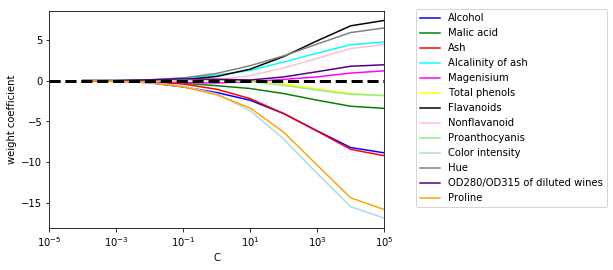

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr2 = LogisticRegression(penalty='l2', C=10.**c, random_state=0)
    lr2.fit(X_train_std, y_train)
    weights.append(lr2.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

In [38]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 1):
        self.scoring = scoring#评分函数，也可以看作损失函数
        self.estimator = clone(estimator)#分类器
        self.k_features = k_features#目标维数
        self.test_size = test_size#数据集划分比例
        self.random_state = random_state#随机种子
    def fit(self,X, y):
        #划分数据集
        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = self.test_size, random_state = self.random_state)
        
        dim = X_train.shape[1]#特征维数
        self.indices_ = tuple(range(dim))#当前特征选取为 全部特征
        self.subsets_ = [self.indices_]#将特征选取加入 子集
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)#选取全部特征 进行评分
        self.scores_ = [score]#记录当前特征的得分
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r = dim - 1):#将特征维度减一并得到对应的排列组合
                score = self._calc_score(X_train, y_train, X_test, y_test, p)#每个组合进行评分
                scores.append(score)#将评分记录
                subsets.append(p)#将特征组合记录
            best = np.argmax(scores)#选取评分最高组合的坐标
            self.indices_ = subsets[best]#特征选取 更新为评分最高的组合
            self.subsets_.append(self.indices_)#将该组合加入子集
            dim -=1#特征的维数 -1
            self.scores_.append(scores[best])#记录最好组合的评分
        self.k_scores_ = self.scores_[-1]#最后加入的评分就是特征维度为k的评分
        
        return self
    
    def transform(self, X):
        return X[:,self.indices_]#给定坐标返回对应特征
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):#根据给定的特征进行拟合，评
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    

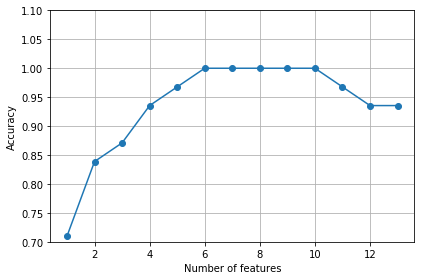

In [39]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std,y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

In [40]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
 (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
 (0, 3, 4, 5, 6, 7, 8, 9, 10, 11),
 (0, 3, 4, 5, 6, 7, 8, 9, 11),
 (0, 3, 4, 5, 6, 7, 8, 11),
 (0, 3, 4, 5, 6, 7, 11),
 (0, 3, 4, 5, 6, 11),
 (0, 3, 4, 5, 6),
 (0, 3, 4, 5),
 (0, 4, 5),
 (0, 5),
 (0,)]

In [41]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Alcalinity of ash', 'Magenisium', 'Total phenols',
       'Flavanoids'],
      dtype='object')


In [42]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 1.0


In [43]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9259259259259259


 1) Proline                        0.183851
 2) Flavanoids                     0.165749
 3) Color intensity                0.157558
 4) OD280/OD315 of diluted wines   0.130049
 5) Alcohol                        0.113691
 6) Hue                            0.062726
 7) Total phenols                  0.052036
 8) Magenisium                     0.032533
 9) Malic acid                     0.027814
10) Alcalinity of ash              0.023071
11) Proanthocyanis                 0.022359
12) Nonflavanoid                   0.014946
13) Ash                            0.013617


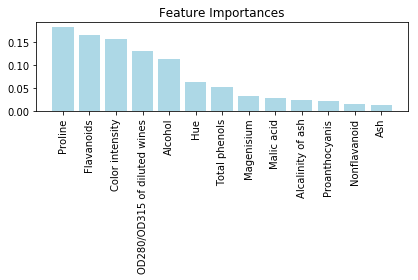

In [44]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()